In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv') #importing the dataset


In [4]:
df.info() #displays information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.head() #displays first few rows

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.isnull().sum() #checks for any missing values


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

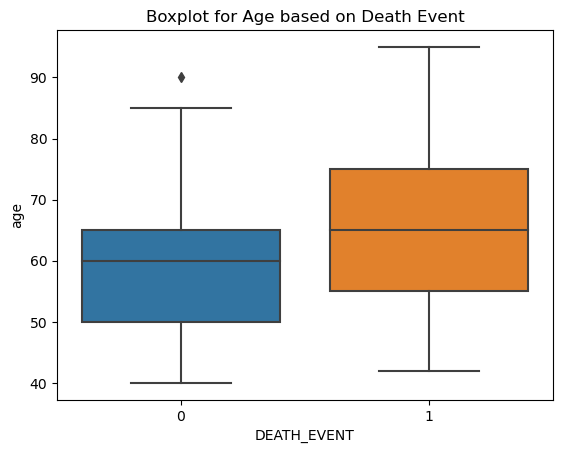

In [7]:
#visual1: Boxplot for Age vs Death Event
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Boxplot for Age based on Death Event')
plt.show()

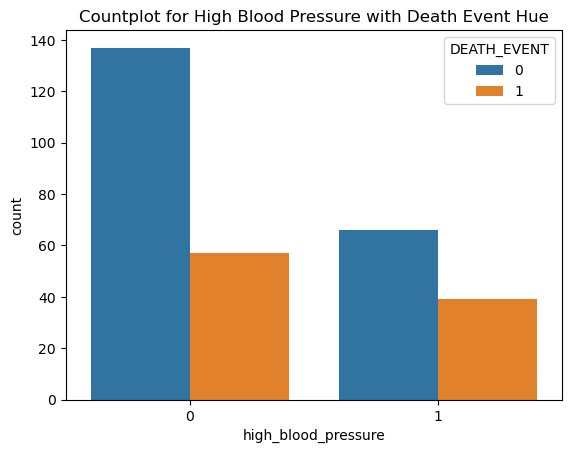

In [8]:
#visual2: Countplot for High Blood Pressure with Death Event hue
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df)
plt.title('Countplot for High Blood Pressure with Death Event Hue')
plt.show()

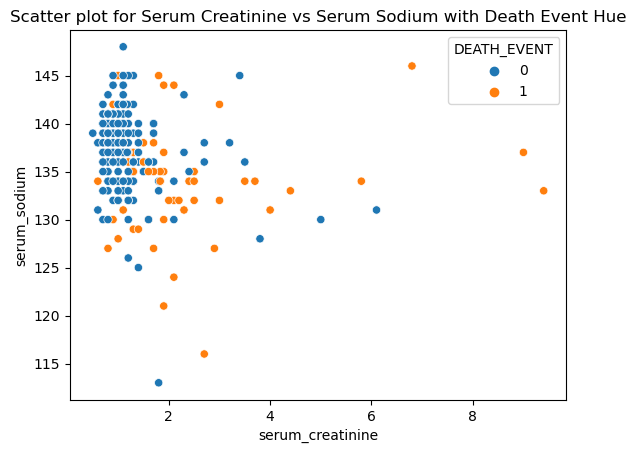

In [9]:
#visual3: two features and a condition
sns.scatterplot(x='serum_creatinine', y='serum_sodium', hue='DEATH_EVENT', data=df)
plt.title('Scatter plot for Serum Creatinine vs Serum Sodium with Death Event Hue')
plt.show()

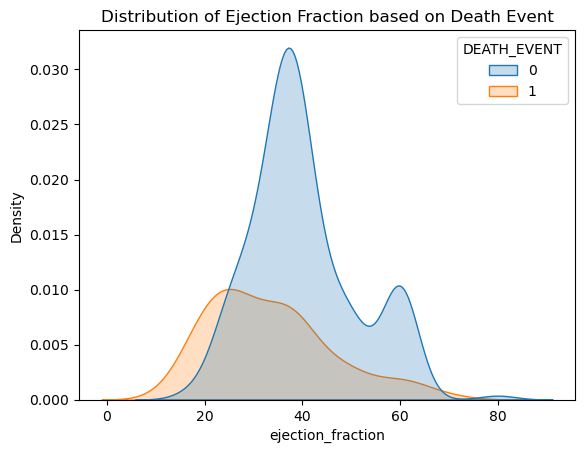

In [10]:
#visuals 4: Distribution of Ejection Fraction vs Death Event
sns.kdeplot(x='ejection_fraction', hue='DEATH_EVENT', data=df, fill=True)
plt.title('Distribution of Ejection Fraction based on Death Event')
plt.show()

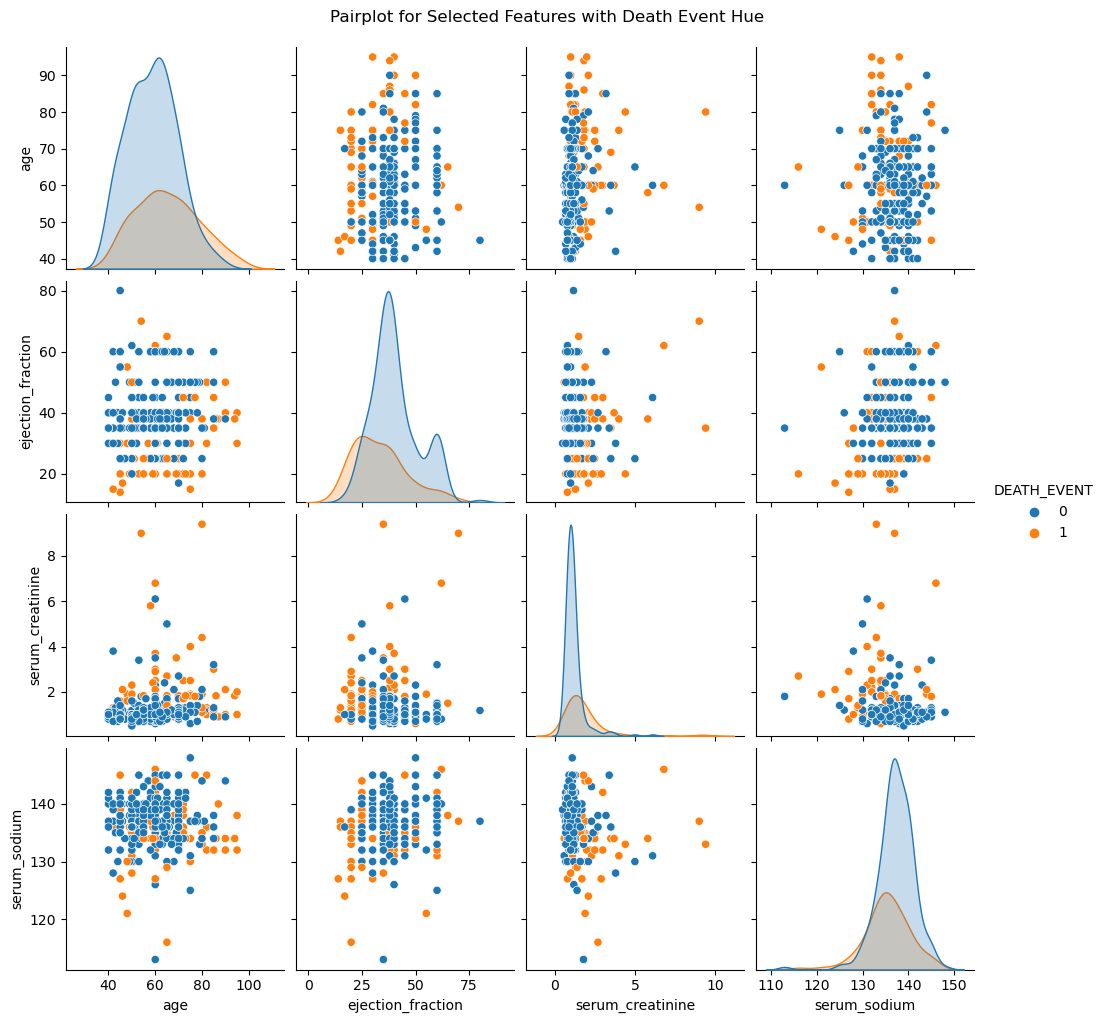

In [11]:
#visuals 5: Pairplot for selected features vs 'Death Event hue
sns.pairplot(df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']], hue='DEATH_EVENT', diag_kind='kde')
plt.suptitle('Pairplot for Selected Features with Death Event Hue', y=1.02)
plt.show()

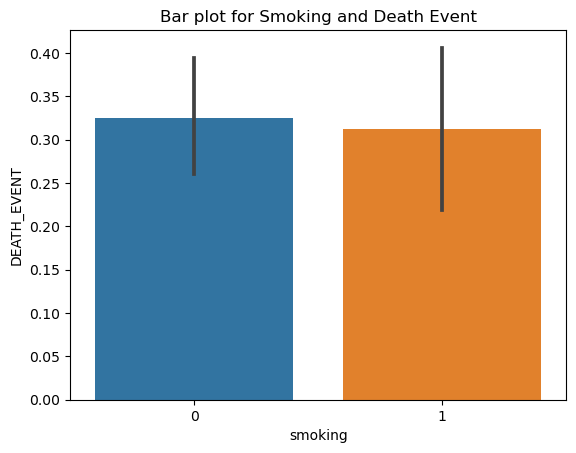

In [12]:
#visuals 6: Bar plot for smoking and Death Event
sns.barplot(x='smoking', y='DEATH_EVENT', data=df)
plt.title('Bar plot for Smoking and Death Event')
plt.show()

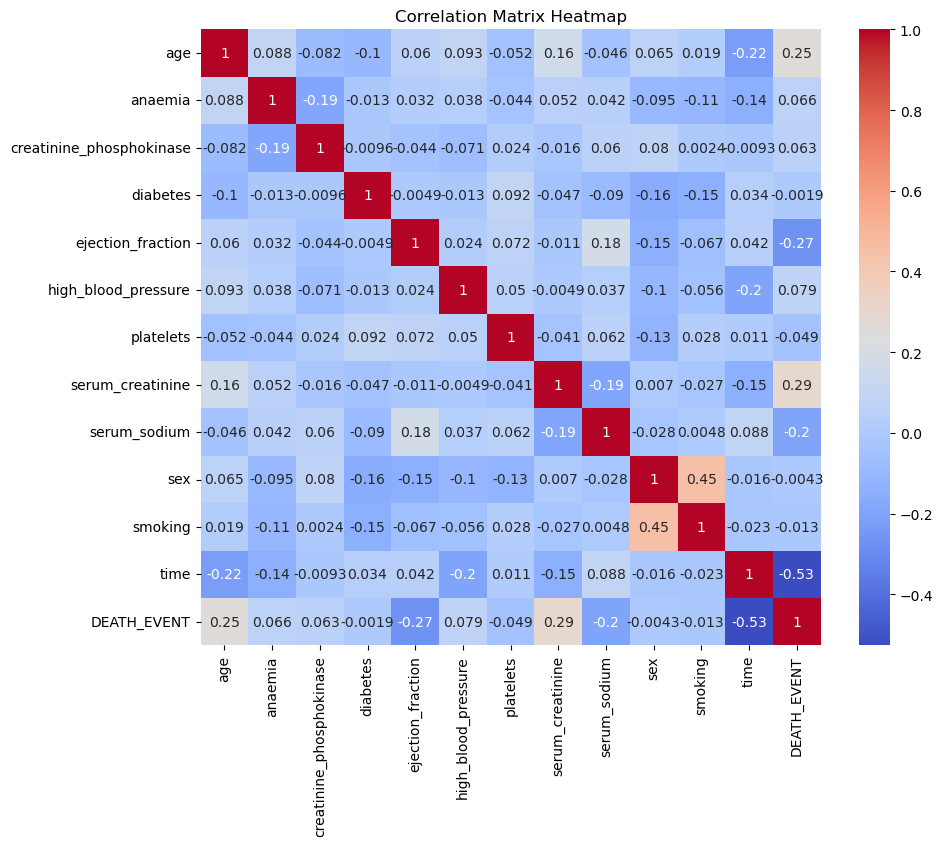

In [13]:
#visual 7: Heatmap for correlation matrix
plt.figure(figsize=(10, 8))  #adjusted the figure size because it got too compressed
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



In [16]:
from sklearn.ensemble import GradientBoostingClassifier



In [17]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

gb_predictions = gb_model.predict(X_test)


In [18]:
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)
print(classification_report(y_test, gb_predictions))


Gradient Boosting Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.72      0.89      0.79        35
           1       0.76      0.52      0.62        25

    accuracy                           0.73        60
   macro avg       0.74      0.70      0.71        60
weighted avg       0.74      0.73      0.72        60

